# Project 2

You want to invest DKK 100.000 in a portfolio of mutual funds and ETFs using the Markowitz model.

## Asset univserse

Having learnt about the Investment Funnel tool in this course, you decide to pick your portfolios from the following asset universe:

**You may assume that the risk free rate of return is 0.00 (0%).** Download weekly adjusted returns from the Investment Funnel from January 11, 2012 until August 18, 2021 for the 17 given assets.

In [5]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from datetime import datetime

In [6]:
assets = pd.read_csv('./ProjectData.csv', index_col="Date")

In [7]:
assets

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
Date,,,,,,,,,,,,,,,,,
2012-01-11 00:00:00+00:00,-3.413552e-04,0.119967,0.000000,0.032436,0.013744,0.068514,0.005917,0.008606,-0.000308,0.000000,0.066046,-0.006328,-0.008395,0.017068,0.013658,0.017455,0.014290
2012-01-18 00:00:00+00:00,2.731774e-02,0.023630,0.000000,0.048908,-0.009472,0.031990,0.009519,-0.010395,-0.007467,0.000000,0.013430,-0.015054,-0.003211,0.019694,0.004268,0.042003,0.012232
2012-01-25 00:00:00+00:00,6.232342e-02,0.030809,0.000000,-0.010940,-0.000730,0.030998,0.011319,-0.010565,-0.027729,0.000000,-0.030453,-0.013913,0.000581,-0.007353,0.010851,0.024022,-0.012298
2012-02-01 00:00:00+00:00,-2.080726e-02,0.011589,0.001872,0.027277,-0.008455,0.026424,0.015219,0.003498,0.020847,0.002111,0.008784,0.006244,0.008224,0.015901,0.023434,-0.005031,0.041806
2012-02-08 00:00:00+00:00,3.882409e-02,0.034456,0.000000,0.014844,0.004844,0.018517,0.011017,-0.006727,-0.019669,0.000000,0.048572,0.004574,0.002938,0.022475,0.009696,0.011882,0.055619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-21 00:00:00+00:00,0.000000e+00,-0.005933,0.001823,-0.007686,0.003066,-0.015878,-0.006619,-0.004069,-0.016322,0.001098,0.002942,-0.149369,-0.093576,0.003192,-0.092242,-0.020690,-0.020646
2021-07-28 00:00:00+00:00,6.724823e-08,0.000000,0.002224,0.018729,-0.004430,0.001034,0.001991,-0.006326,0.012492,0.001296,-0.003098,0.154184,0.102261,0.038146,0.150363,0.005162,-0.006029
2021-08-04 00:00:00+00:00,-6.724823e-08,0.034247,0.001311,0.029251,0.004943,0.030400,0.004925,0.002851,-0.018819,0.000498,0.017194,0.009536,0.001865,-0.005349,-0.040421,0.021622,0.004623


## Question 1

#### 1.1- Explain how these 17 assets were chosen in the Investment Funnel to the TA when you present your results. In other words explain how the Minimum Spanning Tree method isused to choose these assets. (Hint: Kourosh has given a lecture on this topic Wednesday13th of October).

*Se https://www.youtube.com/watch?v=KDgMlrItvSg&list=PLs3ReowHfQgqz7ptdGRRxTDAP4e8qBtHr&index=27&ab_channel=KouroshMarjaniRasmussen og/eller https://www.youtube.com/watch?v=I0-0QEEHs0U&list=PLs3ReowHfQgqz7ptdGRRxTDAP4e8qBtHr&index=26 for å få svar*

## Question 2

#### 2.1 -  Assuming your 100.000 DKK in any of these 17 assets at the beginning of the period, draw 17 graphs in the same frame showing the development of your investment during the entire period.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


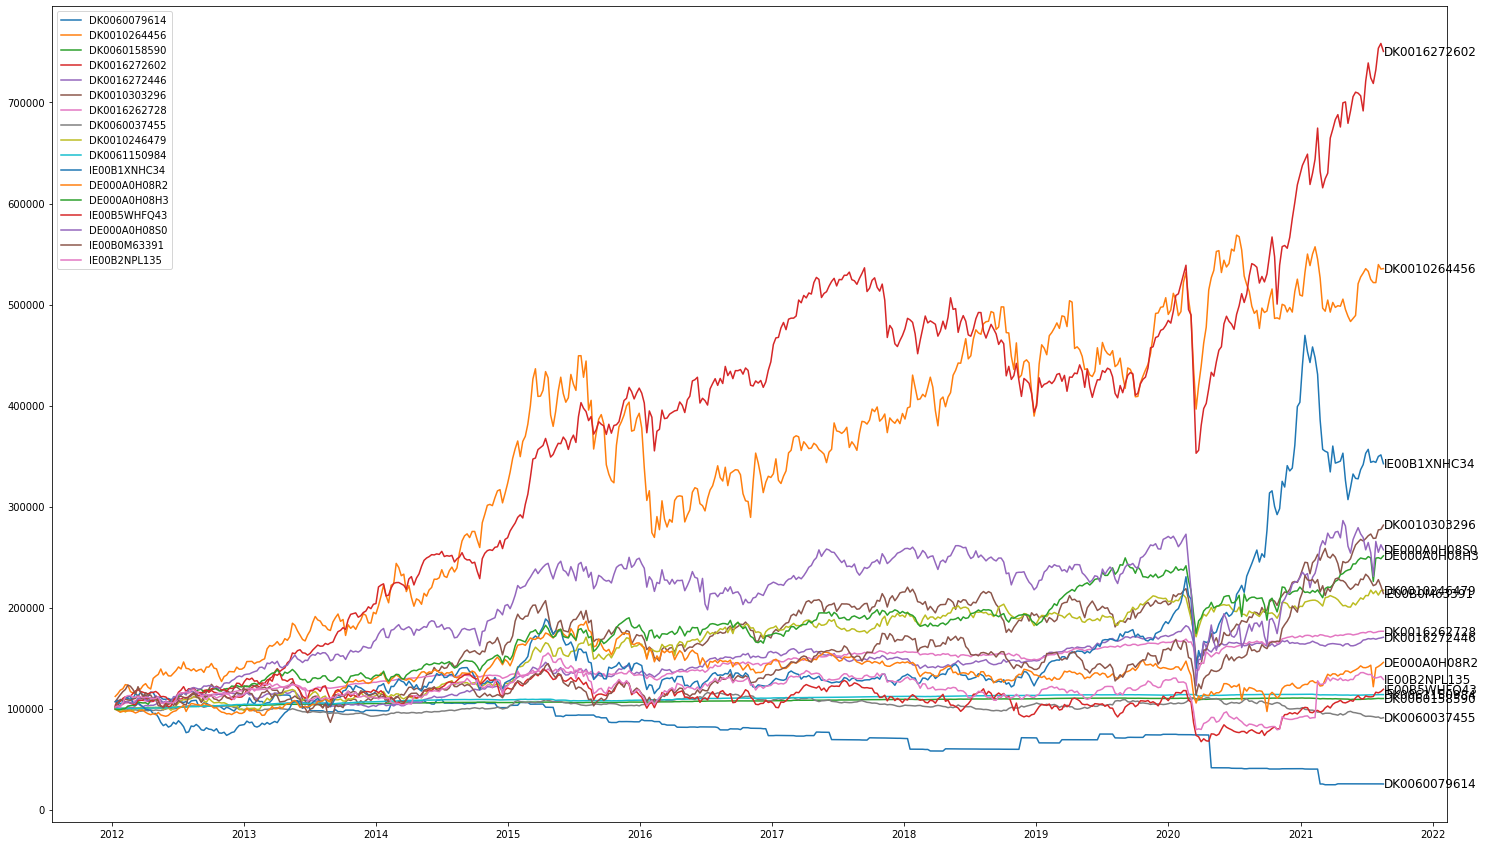

In [8]:
dates = [datetime.strptime(date[:-6], '%Y-%m-%d %H:%M:%S') for date in assets.index]

plt.figure(figsize=(25,15))

#regne på "nåverdi" av de 100 000 kr
for asset in assets.columns:
    values = [100000+(100000*assets[asset][0])] #begynne på 0-indeks i asseten
    
    for i in range(len(dates)-1):
        values.append(values[i]+(assets[asset][i+1]*values[i])) #går fra indeks 1 til 502 i asset
    plt.plot(dates, values, label=asset)
    plt.annotate(asset, xy=(dates[-1], values[-1]), size=12, va="center") #teksten ved enden av zsgrafene
    
plt.legend()
plt.show()

#### 2.2 - What are the average historical returns (in annualized terms), standard deviation of returns (also in annualized terms) and correlation between returns?

In [9]:
from scipy.stats.mstats import gmean

def average_return(return_list):
    return_list = [x+1 for x in return_list]
    
    return gmean(return_list)-1

def annualize_weekly(avg_return_weekly):
    return (1+avg_return_weekly)**52-1


In [10]:
# both annualized

average_returns = [annualize_weekly(average_return(assets[asset])) for asset in assets]
stds = [np.std(assets[asset])*np.sqrt(52) for asset in assets]

In [11]:
asset_names = assets.columns
asset_info = [list(asset_info) for asset_info in zip(average_returns, stds)]

info_df = pd.DataFrame(asset_info).T
info_df.columns = asset_names
info_df.index = ["Average return", "Standard deviation"]


info_df

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
Average return,-0.132703,0.189850,0.009853,0.232191,0.056862,0.113197,0.060617,-0.009837,0.083636,0.013467,0.135964,0.039762,0.100117,0.018247,0.102770,0.081942,0.026561
Standard deviation,0.229282,0.258206,0.008073,0.184230,0.096878,0.211071,0.080562,0.058636,0.141711,0.010117,0.249625,0.204142,0.161556,0.215989,0.254739,0.202228,0.227376


In [12]:
print("The correlation between the different assets:")
assets.corr()

The correlation between the different assets:


,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
DK0060079614,1.000000,-0.023496,0.036491,-0.011464,-0.002035,-0.038681,-0.002470,0.045670,-0.038240,0.018203,0.001599,-0.043966,-0.031255,-0.126571,-0.129745,-0.002246,-0.023434
DK0010264456,-0.023496,1.000000,0.008689,0.502588,0.430291,0.397833,0.258153,-0.053772,0.443713,-0.009022,0.493923,0.365941,0.404735,0.369472,0.435003,0.389898,0.264186
DK0060158590,0.036491,0.008689,1.000000,0.130159,0.079073,0.140348,0.199508,0.023099,-0.042793,0.506563,-0.000561,-0.030736,0.048443,0.022971,0.015072,0.016998,-0.013771
DK0016272602,-0.011464,0.502588,0.130159,1.000000,0.355437,0.470374,0.437817,-0.170712,0.423253,0.055917,0.577130,0.437962,0.461761,0.453959,0.571759,0.461994,0.416033
DK0016272446,-0.002035,0.430291,0.079073,0.355437,1.000000,0.474203,0.497497,0.183739,0.536023,0.113075,0.412428,0.316122,0.435189,0.406269,0.377472,0.411289,0.414320
DK0010303296,-0.038681,0.397833,0.140348,0.470374,0.474203,1.000000,0.308170,0.043977,0.478668,0.135118,0.505458,0.390896,0.456143,0.496331,0.461247,0.542081,0.419526
DK0016262728,-0.002470,0.258153,0.199508,0.437817,0.497497,0.308170,1.000000,-0.000647,0.220238,0.121569,0.325830,0.271843,0.313804,0.325518,0.426981,0.377124,0.337967
DK0060037455,0.045670,-0.053772,0.023099,-0.170712,0.183739,0.043977,-0.000647,1.000000,0.061582,0.031539,-0.050886,-0.087705,0.062419,-0.064555,-0.161388,-0.081713,-0.063180
DK0010246479,-0.038240,0.443713,-0.042793,0.423253,0.536023,0.478668,0.220238,0.061582,1.000000,0.029305,0.454839,0.481191,0.578701,0.432097,0.474843,0.451070,0.383306
DK0061150984,0.018203,-0.009022,0.506563,0.055917,0.113075,0.135118,0.121569,0.031539,0.029305,1.000000,-0.043876,-0.068091,-0.020241,0.047302,-0.124902,-0.008177,0.037349


#### 2.3 - What does the distribution of returns look like? What are the range, skewness, kurtosis and autocorrelation of the returns? What is the Sharpe Ratio of each asset?

In [13]:
from scipy.stats import kurtosis, skew

range_list = [(round(min(assets[asset]), 4), round(max(assets[asset]), 4)) for asset in assets]
skewness_list = [round(skew(assets[asset]), 4) for asset in assets]
kurtosis_list = [round(kurtosis(assets[asset], bias=False), 4) for asset in assets]

#usikker på om man skal ta mode=full her eller ikke
autocorrelation_list = [round(np.correlate(assets[asset], assets[asset])[0], 4) for asset in assets]


In [14]:
def calculate_sharpe(expected_return, expected_std, risk_free_return=0):
    return (expected_return-risk_free_return)/expected_std

In [15]:
# info_df[asset][0] = avg return
# info_df[asset][1] = std

sharpe_ratio_list = [calculate_sharpe(info_df[asset][0], info_df[asset][1]) 
               for asset in info_df]

In [16]:

distribution_info = [list(distributions) for distributions in 
                     zip(range_list, skewness_list, kurtosis_list, autocorrelation_list, sharpe_ratio_list)]

distribution_df = pd.DataFrame(distribution_info)
distribution_df.index = asset_names
distribution_df.columns = ["Ranges (min, max)", "Skewness", "Kurtosis", "Autocorrelation", "Sharpe ratio"]

distribution_df

,"Ranges (min, max)",Skewness,Kurtosis,Autocorrelation,Sharpe ratio
DK0060079614,"(-0.4391, 0.1926)",-8.0156,108.8975,0.5097,-0.578775
DK0010264456,"(-0.1316, 0.1206)",-0.2214,1.3646,0.6516,0.735268
DK0060158590,"(-0.01, 0.0053)",-1.4518,19.3109,0.0006,1.220442
DK0016272602,"(-0.1658, 0.0865)",-1.1223,6.2749,0.3372,1.260335
DK0016272446,"(-0.0994, 0.0497)",-1.2024,7.5518,0.0913,0.586943
DK0010303296,"(-0.1529, 0.1108)",-0.5963,2.9345,0.4332,0.536298
DK0016262728,"(-0.1428, 0.0788)",-3.5599,59.3322,0.0634,0.752423
DK0060037455,"(-0.0247, 0.036)",0.2667,1.4331,0.0332,-0.167768
DK0010246479,"(-0.0925, 0.0688)",-0.2686,1.5408,0.1954,0.590189
DK0061150984,"(-0.0168, 0.0079)",-3.5742,47.7234,0.0010,1.331164


**Discussion**

*(han sa i forelesning at vi bør finne skew og kurtosis for norm.dist, og sammenligne verdier, tynn diskusjon her)*

As the skewness and kurtosis of a normal distribution is expected to be 0 and 3, respectively, we can observe that the returns of `DK0010264456`, `DK0010303296.`, `DK0060037455`, `DK0010246479`, and `IE00B0M63391` are closest to being normally distributed. 

We can also observe that `DK0060079614`, `DK0016262728`, `DK0061150984` and `IE00B2NPL135` are least similar to a normal distribution. Their high kurtosis values indicate that the probability for outliers is high, also meaning it is more unpredictable and hence has a higher risk.




## Question 3

Based on the Markowitz portfolio theory, derive and illustrate the optimal portfolio choices. Identify the following portfolios **in terms of weights, return and risk**:

#### 3.1 - The maximum expected return portfolio.

In [17]:
print("The maxiumum expected return is the return received if you weight the asset with the highest expected return 1")
max(info_df.loc["Average return"])



The maxiumum expected return is the return received if you weight the asset with the highest expected return 1


0.2321910677627561

#### 3.2 - The global minimum variance portfolio.

In [18]:
print("See task 3.3 for minimum variance")

See task 3.3 for minimum variance


####  3.3 - Draw the efficient frontier using 8 different expected returns in between the returns you found in questions 3.1 and 3.2. There should be equal distance between each pair of returns in the efficient frontier. Find the portfolio weights for each of the 8 optimal portfolios as well.

The minimum variance is 0.00010504464571342314


<function matplotlib.pyplot.show(*args, **kw)>

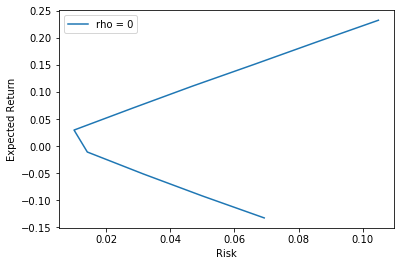

In [84]:
from numpy.linalg import inv

highest_return=max(info_df.loc["Average return"])
lowest_return=min(info_df.loc["Average return"])

# Compute 8 equally distributed returns between the highest and lowest return
mu_ps = [(i *(highest_return-lowest_return)/9)+lowest_return for i in range(0,10)]


# List of average returns
avg_ret = info_df.loc["Average return"]
mu = np.array(avg_ret)

# Compute the minimum variance
sd = info_df.loc["Standard deviation"]
var =  np.array([x**2 for x in sd])
Sigma = np.diag(var)

# Compute optimal weights and variance(the minimum)
def minVarPort(mu, Sigma, mu_p):
    n = len(mu)
    mu_1 = np.ones([n,2])
    mu_1[:,0] = mu
    A = np.transpose(mu_1) @ inv(Sigma) @ mu_1
    Ainv = inv(A)
    opt_weights = inv(Sigma)@ mu_1 @ Ainv @ np.array([[mu_p], [1]])
    opt_var = np.array([[mu_p, 1]]) @ Ainv @ np.array([[mu_p],[1]])
    return {"Weights": opt_weights, "variance": opt_var[0,0], "mu": mu_p}

# Calculate the EF
df_list = []
for mu_p in mu_ps:
    opt_port = minVarPort(mu, Sigma, mu_p)
    df_list.append(opt_port)

EF0 = pd.DataFrame(df_list).round(4)
EF0['std'] = np.sqrt(EF0['variance'])

variance = []
for value in df_list:
    variance.append(value['variance'])
print("The minimum variance is", min(variance))

plt.plot(EF0['std'],mu_ps, label = 'rho = 0')
plt.xlabel("Risk")
plt.ylabel("Expected Return")
plt.legend()
plt.show

#### 3.4 - What is the equal weight portfolio? Use the return of this portfolio as the target return in the following question. Draw the risk and return of the equal weight portfolio in the same graph together with the efficient frontier.

Equal weight is a type of proportional measuring method that gives the same importance to each stock in a portfolio. 

In [120]:
# Build equal weight portfolio based on all 17 assets
# Draw it to see how the risk and return are placed compared to the efficient frontierr
import numpy as np

numstocks = 17
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
avg_ret = np.array(info_df.loc["Average return"])
equal_weight_portfolio = np.multiply(avg_ret, portfolio_weights_ew)
return_ew_portfolio = sum(equal_weight_portfolio)

print(equal_weight_portfolio)
print("Return of equal weight portfolio", return_ew_portfolio)

[-0.00780604  0.01116767  0.00057956  0.0136583   0.00334483  0.00665865
  0.0035657  -0.00057866  0.00491979  0.0007922   0.00799788  0.00233891
  0.00588926  0.00107338  0.00604529  0.00482011  0.00156242]
Return of equal weight portfolio 0.06602925986701386


<function matplotlib.pyplot.show(*args, **kw)>

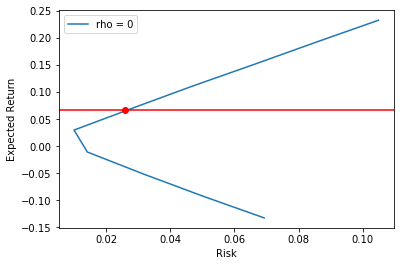

In [118]:
# Compute optimal weights and variance(the minimum)
plt.plot(EF0['std'], mu_ps, label = 'rho = 0')
plt.axhline(y=return_ew_portfolio, color='r', linestyle='-')
plt.plot(0.026, return_ew_portfolio , 'ro')
plt.xlabel("Risk")
plt.ylabel("Expected Return")
plt.legend()
plt.show


#### 3.5 - Now find the exact optimal portfolio that has the same return as the return in the equal weight portfolio. Add this point on the efficient frontier and calculate the difference ofexpected return between this portfolio and the queal weight portfolio.

In [51]:
# Use the equal weight portfolio
# Run Markowitz formula one more time where
#    target return = equal weight portfolio
# Find the exact point on the efficient frontier that has the same return



#### 3.6 - Find the tangent portfolio, and draw the capital market line from the risk free point to the efficient frontier.

In [109]:
returns = assets
#stocks["Adj Close"].pct_change().iloc[1:,:]
returns.head(5)

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
Date,,,,,,,,,,,,,,,,,
2012-01-11 00:00:00+00:00,-0.000341,0.119967,0.000000,0.032436,0.013744,0.068514,0.005917,0.008606,-0.000308,0.000000,0.066046,-0.006328,-0.008395,0.017068,0.013658,0.017455,0.014290
2012-01-18 00:00:00+00:00,0.027318,0.023630,0.000000,0.048908,-0.009472,0.031990,0.009519,-0.010395,-0.007467,0.000000,0.013430,-0.015054,-0.003211,0.019694,0.004268,0.042003,0.012232
2012-01-25 00:00:00+00:00,0.062323,0.030809,0.000000,-0.010940,-0.000730,0.030998,0.011319,-0.010565,-0.027729,0.000000,-0.030453,-0.013913,0.000581,-0.007353,0.010851,0.024022,-0.012298
2012-02-01 00:00:00+00:00,-0.020807,0.011589,0.001872,0.027277,-0.008455,0.026424,0.015219,0.003498,0.020847,0.002111,0.008784,0.006244,0.008224,0.015901,0.023434,-0.005031,0.041806
2012-02-08 00:00:00+00:00,0.038824,0.034456,0.000000,0.014844,0.004844,0.018517,0.011017,-0.006727,-0.019669,0.000000,0.048572,0.004574,0.002938,0.022475,0.009696,0.011882,0.055619


In [111]:
weeklymean = gmean(returns+1)-1
weeklycov = returns.cov()
annual_mean = (1+weeklymean)**52-1
annual_cov = weeklycov*52

In [112]:
annual_cov = annual_cov.values

In [113]:
def compute_cpm(Sigma, mu, mu_p, mu_0):
    mu = np.expand_dims(mu, 1)
    mu_e = mu - mu_0
    mu_p_e = mu_p - mu_0
    weights = inv(Sigma) @ mu_e @ (mu_p_e / (mu_e.T @ inv(Sigma) @ mu_e))
    portfolio_std = mu_p_e / np.sqrt(mu_e.T @ inv(Sigma) @ mu_e)
    return weights, portfolio_std, mu_p

In [114]:
cpm_mu = np.arange(start=0.01, stop=0.5, step=0.01)
cpm_returns = np.array([])
cpm_stds = np.array([])
for portfolio_mu in cpm_mu:
    # stated in the task that we can assume the risk free rate (mu_0) to be zero
    _, standard_dev, mu = compute_cpm(annual_cov, annual_mean, portfolio_mu, 0)
    cpm_returns = np.append(cpm_returns, mu)
    cpm_stds = np.append(cpm_stds, standard_dev)

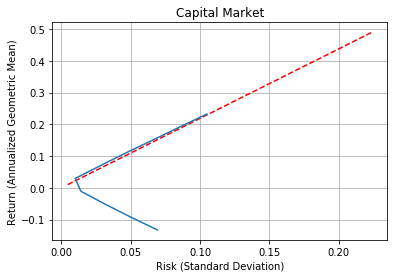

In [117]:
plt.plot(cpm_stds, cpm_returns, label='CPM Line', color='r', linestyle='--')
plt.plot(EF0['std'], mu_ps, label = 'rho = 0')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return (Annualized Geometric Mean)')
plt.title('Capital Market')
plt.grid()
plt.show()